In [1]:
import pandas as pd

In [2]:
train = pd.read_excel('train_universidad.xlsx', sheet_name=1)

In [3]:
train.sample(5)

,COD_ENCUESTADO,Nombre Campus,NIVEL ACTUAL,Clave de carrera,Ciclo,COMENTARIO,IND_GEA,IND_DELEGADO,CANT_CURSOS_MATRICU_SIN_INGLES,UOD_depostista_ind_deportista,NPS
2368,7088,1,AC,25,4,En el sistema de cursos mas habilitaciones de...,NaN,NaN,5.0,NaN,3
7370,21906,4,AC,25,1,Mucha mora,NaN,NaN,4.0,NaN,2
11966,3668,2,AC,26,1,"En primer lugar,aumentaria las becas para est...",NaN,NaN,5.0,NaN,3
11613,30435,4,PRESENCIAL,213,1,Los tópicos de las materias deberian ser con ...,NaN,NaN,NaN,NaN,3
13547,7550,3,AC,21,2,ampliar el comedor universitario y los cubilos,NaN,NaN,6.0,NaN,3


In [13]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
COD_ENCUESTADO,20000,20000,6026,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nombre Campus,20000,4,3,8361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NIVEL ACTUAL,20000,4,AC,14990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clave de carrera,20000,72,5,1616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ciclo,20000,NaN,NaN,NaN,3.0524,2.35532,1,1,2,4,14
COMENTARIO,20000,17611,La enseñanza,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IND_GEA,20000,2,False,19701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IND_DELEGADO,20000,2,False,16468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CANT_CURSOS_MATRICU_SIN_INGLES,20000,NaN,NaN,NaN,4.6974,1.54329,0,4,5,6,10
UOD_depostista_ind_deportista,20000,2,False,19852,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cat_cols = ['COD_ENCUESTADO', 'Nombre Campus', 'NIVEL ACTUAL', 'Clave de carrera']

In [6]:
for c in cat_cols:
    train[c] = train[c].astype(str)

In [8]:
binary_cols = ['IND_GEA', 'IND_DELEGADO', 'UOD_depostista_ind_deportista']

In [9]:
for c in binary_cols:
    train[c] = train[c].notnull()

In [12]:
train.fillna(0, inplace=True)

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

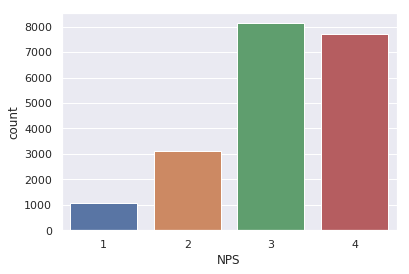

In [17]:
sns.countplot(train.NPS);

In [18]:
train.NPS.value_counts(normalize=True)

3    0.40680
4    0.38480
2    0.15535
1    0.05305
Name: NPS, dtype: float64

# Baseline 

In [20]:
cols = [c for c in train if c not in ['COD_ENCUESTADO', 'NPS', 'COMENTARIO']]

In [26]:
X, y = train[cols].copy(), train.NPS

In [40]:
X.head()

,Nombre Campus,NIVEL ACTUAL,Clave de carrera,Ciclo,IND_GEA,IND_DELEGADO,CANT_CURSOS_MATRICU_SIN_INGLES,UOD_depostista_ind_deportista
0,1,0,3,2,False,True,6.0,False
1,3,0,25,1,False,True,5.0,False
2,4,0,31,1,False,False,5.0,False
3,4,0,28,6,True,False,6.0,False
4,3,0,34,1,False,False,6.0,False


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
lencoder = LabelEncoder()
X['NIVEL ACTUAL'] = lencoder.fit_transform(X['NIVEL ACTUAL'])

In [32]:
cat_cols = ['Nombre Campus', 'Clave de carrera']

In [33]:
for c in cat_cols:
    X[c] = X[c].astype(int)

## Model

In [36]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

In [37]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()

In [39]:
from sklearn.model_selection import cross_validate

In [41]:
%%time
results = cross_validate(model, X, y, scoring='neg_log_loss', cv=kfolds,
                         return_train_score=True)

CPU times: user 16.1 s, sys: 342 ms, total: 16.5 s
Wall time: 2.35 s


In [43]:
pd.DataFrame(results)

,fit_time,score_time,test_score,train_score
0,0.552034,0.024303,-1.179061,-1.087184
1,0.282376,0.025822,-1.188940,-1.084105
2,0.304246,0.021132,-1.169105,-1.088551
3,0.312581,0.034014,-1.149714,-1.093459
4,0.375620,0.020907,-1.163037,-1.091426


# Text processing

In [45]:
desc = train.COMENTARIO[52]

In [46]:
desc

' La enseñanza y temas son engaña muchachosel curso de calculo que toma 6 meses en otras universidades y en la universidad lo meten en una semana ,lo mismo para los otros cursos de ciencias. LLos pagos deberian bajarlos si desean hacer su metodo blended El acceso a las sede de la misma universidad luego de quitar las sede de alquiler , se convierte en dolor de cabeza para poder llegar . slds No hablo con el higado deberian preocuparse por el futuro de un pais y ser justos con la enseñanza, no es del todo didáctico'

In [49]:
import unicodedata

In [67]:
def clean(s):
    s = s.lower()
    s = unicodedata.normalize('NFKD', s) \
                   .encode('ascii', 'ignore') \
                   .decode('utf-8', 'ignore')
    s = re.sub('[^a-z]+', ' ', s)
    s = s.strip()
    return s

In [63]:
import re
re.findall('[^a-z ]', desc.lower())

['ñ', 'ñ', '6', ',', '.', ',', '.', 'ñ', ',', 'á']

In [68]:
clean(desc)

'la ensenanza y temas son engana muchachosel curso de calculo que toma meses en otras universidades y en la universidad lo meten en una semana lo mismo para los otros cursos de ciencias llos pagos deberian bajarlos si desean hacer su metodo blended el acceso a las sede de la misma universidad luego de quitar las sede de alquiler se convierte en dolor de cabeza para poder llegar slds no hablo con el higado deberian preocuparse por el futuro de un pais y ser justos con la ensenanza no es del todo didactico'

In [69]:
train['clean_comment'] = train.COMENTARIO.apply(clean)

In [72]:
train['len_comment'] = train.clean_comment.apply(len)

In [78]:
train['nwords_comment'] = train.clean_comment.apply(lambda x: len(x.split()))

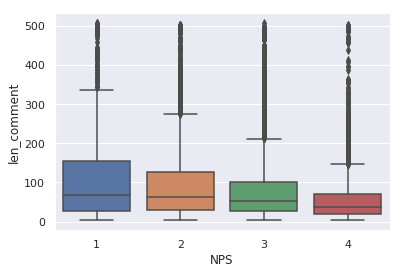

In [80]:
sns.boxplot('NPS', 'len_comment', data=train);

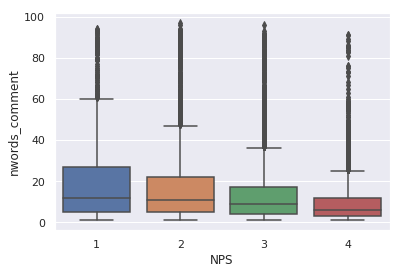

In [81]:
sns.boxplot('NPS', 'nwords_comment', data=train);

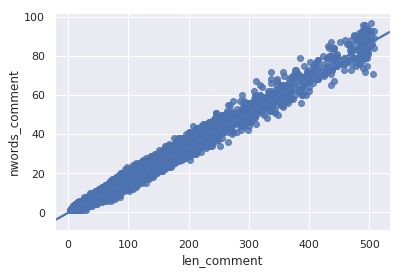

In [82]:
sns.regplot('len_comment', 'nwords_comment', data=train);

In [83]:
from collections import Counter

In [93]:
counter = Counter()
for desc in train.clean_comment:
    counter.update(desc.split())

In [95]:
counter.most_common(10)

[('de', 13130),
 ('la', 11678),
 ('que', 8273),
 ('y', 8078),
 ('en', 7201),
 ('los', 7197),
 ('el', 5916),
 ('no', 4584),
 ('es', 4086),
 ('a', 3602)]

In [96]:
counter.most_common()[-10:]

[('retroactivos', 1),
 ('desordenan', 1),
 ('primos', 1),
 ('justificada', 1),
 ('ceder', 1),
 ('hipercalorico', 1),
 ('proteico', 1),
 ('estabilizan', 1),
 ('counters', 1),
 ('registrada', 1)]

In [101]:
len(counter), sum(counter.values())

(11333, 251571)

## Vectorization

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

In [103]:
vectorizer = CountVectorizer()

In [107]:
X_count = vectorizer.fit_transform(train.clean_comment)

In [108]:
X_count.shape

(20000, 11309)

In [123]:
from stop_words import get_stop_words
stopwords = get_stop_words('spanish')

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.8, min_df=10, stop_words=stopwords)
X_tfidf = vectorizer.fit_transform(train.clean_comment)

In [126]:
X_tfidf.shape

(20000, 1555)

In [127]:
list(vectorizer.vocabulary_.keys())[:10]

['gusta',
 'metodo',
 'blended',
 'hace',
 'bien',
 'profesores',
 'metodos',
 'ensenanza',
 'buena',
 'uso']

## Only text

In [128]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from lightgbm import LGBMClassifier
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)
model = LGBMClassifier()

In [129]:
%%time
results = cross_validate(model, X_tfidf, y, scoring='neg_log_loss', cv=kfolds,
                         return_train_score=True)

CPU times: user 1min 56s, sys: 1.72 s, total: 1min 58s
Wall time: 15.3 s


In [130]:
pd.DataFrame(results)

,fit_time,score_time,test_score,train_score
0,2.718781,0.029073,-0.835978,-0.691337
1,3.072236,0.026225,-0.846042,-0.687465
2,2.922515,0.026842,-0.841537,-0.686480
3,2.776228,0.041837,-0.827133,-0.689893
4,3.141959,0.026131,-0.844811,-0.685813


## All data

In [133]:
X['nwords_comment'] = train.nwords_comment

In [137]:
X.shape, X_tfidf.shape

((20000, 9), (20000, 1555))

In [135]:
import numpy as np

In [139]:
X_all = np.concatenate([X, X_tfidf.toarray()], axis=1)

In [140]:
X_all.shape

(20000, 1564)

In [141]:
%%time
results = cross_validate(model, X_all, y, scoring='neg_log_loss', cv=kfolds,
                         return_train_score=True)

CPU times: user 2min 13s, sys: 3.58 s, total: 2min 16s
Wall time: 21.2 s


In [142]:
pd.DataFrame(results)

,fit_time,score_time,test_score,train_score
0,3.543465,0.166368,-0.825188,-0.667496
1,3.519968,0.157277,-0.839881,-0.663324
2,3.436368,0.157068,-0.832872,-0.662793
3,3.126264,0.158365,-0.813828,-0.667165
4,3.301155,0.164188,-0.831430,-0.663257


# Train all data

In [146]:
train = pd.read_excel('train_universidad.xlsx', sheet_name=1)

In [148]:
train.columns = ['_'.join(c.strip().lower().split()) for c in train]

In [150]:
import re, unicodedata
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

def clean(s):
    s = s.lower()
    s = unicodedata.normalize('NFKD', s).encode('ascii', 'ignore') \
                   .decode('utf-8', 'ignore')
    s = re.sub('[^a-z]+', ' ', s)
    return s.strip()

In [151]:
cols = [c for c in train if c not in ['cod_encuestado', 'comentario', 'nps']]
X, y = train[cols].copy(), train.nps

In [152]:
binary_cols = ['ind_gea', 'ind_delegado', 'uod_depostista_ind_deportista']
for c in binary_cols:
    X[c] = X[c].notnull()
X.fillna(0, inplace=True)

In [153]:
lencoders = {}
cat_cols = ['nombre_campus', 'nivel_actual', 'clave_de_carrera']
for c in cat_cols:
    lencoders[c] = LabelEncoder()
    X[c] = lencoders[c].fit_transform(X[c])

In [154]:
X['nwords_comment'] = train.comentario.apply(lambda x: len(x.split()))

In [155]:
clean_comments = train.comentario.apply(clean)
vectorizer = TfidfVectorizer(max_df=0.7, min_df=10, stop_words=stopwords)
X_tfidf = vectorizer.fit_transform(clean_comments)

In [156]:
X_all = np.concatenate([X, X_tfidf.toarray()], axis=1)
X_all.shape

(20000, 1564)

In [157]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()

In [158]:
model.fit(X_all, y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Feature importance

In [160]:
imp = pd.DataFrame()
imp['feature'] = X.columns.tolist() + \
                [f'tfidf_{c}' for c in vectorizer.get_feature_names()]
imp['importance'] = model.feature_importances_

In [161]:
imp.sort_values('importance', ascending=False)[:10]

,feature,importance
8,nwords_comment,371
2,clave_de_carrera,229
3,ciclo,175
570,tfidf_ensenanza,174
943,tfidf_mejorar,150
915,tfidf_mas,146
1198,tfidf_profesores,145
200,tfidf_buena,134
642,tfidf_exigencia,123
1516,tfidf_valoro,121


## Predict test

In [162]:
test = pd.read_excel('test_universidad.xlsx', sheet_name=0)

In [163]:
test.columns = ['_'.join(c.strip().lower().split()) for c in test]

In [166]:
test_data = list(test.head(3).to_dict(orient='index').values())

In [183]:
{
    'data': test_data
}

{'data': [{'cant_cursos_matricu_sin_ingles': 5.0,
   'ciclo': 6,
   'clave_de_carrera': 7,
   'cod_encuestado': 15118,
   'comentario': ' La universidad debería de ser mas exigente con respecto a los que ingresan a la universidad. Mucha diferencia intelectual',
   'ind_delegado': nan,
   'ind_gea': nan,
   'nivel_actual': 'AC',
   'nombre_campus': 3,
   'uod_depostista_ind_deportista': 'Deportista'},
  {'cant_cursos_matricu_sin_ingles': 5.0,
   'ciclo': 1,
   'clave_de_carrera': 39,
   'cod_encuestado': 6715,
   'comentario': ' No me han fallafo en nada',
   'ind_delegado': nan,
   'ind_gea': nan,
   'nivel_actual': 'AC',
   'nombre_campus': 3,
   'uod_depostista_ind_deportista': nan},
  {'cant_cursos_matricu_sin_ingles': 5.0,
   'ciclo': 4,
   'clave_de_carrera': 101,
   'cod_encuestado': 27492,
   'comentario': ' Prestigio, calidad de enseñanza de los profesores y variedad de horarios.',
   'ind_delegado': nan,
   'ind_gea': nan,
   'nivel_actual': 'FC',
   'nombre_campus': 3,
   'uo

In [167]:
test_data

[{'cant_cursos_matricu_sin_ingles': 5.0,
  'ciclo': 6,
  'clave_de_carrera': 7,
  'cod_encuestado': 15118,
  'comentario': ' La universidad debería de ser mas exigente con respecto a los que ingresan a la universidad. Mucha diferencia intelectual',
  'ind_delegado': nan,
  'ind_gea': nan,
  'nivel_actual': 'AC',
  'nombre_campus': 3,
  'uod_depostista_ind_deportista': 'Deportista'},
 {'cant_cursos_matricu_sin_ingles': 5.0,
  'ciclo': 1,
  'clave_de_carrera': 39,
  'cod_encuestado': 6715,
  'comentario': ' No me han fallafo en nada',
  'ind_delegado': nan,
  'ind_gea': nan,
  'nivel_actual': 'AC',
  'nombre_campus': 3,
  'uod_depostista_ind_deportista': nan},
 {'cant_cursos_matricu_sin_ingles': 5.0,
  'ciclo': 4,
  'clave_de_carrera': 101,
  'cod_encuestado': 27492,
  'comentario': ' Prestigio, calidad de enseñanza de los profesores y variedad de horarios.',
  'ind_delegado': nan,
  'ind_gea': nan,
  'nivel_actual': 'FC',
  'nombre_campus': 3,
  'uod_depostista_ind_deportista': nan}]

In [168]:
def preprocess(data, filter_cols, binary_cols, cat_cols, lencoders, vectorizer):
    df = pd.DataFrame(data)
    X = df[filter_cols].copy()
    for c in binary_cols:
        X[c] = X[c].notnull()
    X.fillna(0, inplace=True)
    for c in cat_cols:
        X[c] = lencoders[c].transform(X[c])
    X['nwords_comment'] = df.comentario.apply(lambda x: len(x.split()))
    clean_comments = df.comentario.apply(clean)
    X_tfidf = vectorizer.transform(clean_comments)
    X_all = np.concatenate([X, X_tfidf.toarray()], axis=1)
    return X_all

In [169]:
X_test = preprocess(test_data, cols, binary_cols, cat_cols, lencoders,
                    vectorizer)

In [172]:
X_test.shape

(3, 1564)

In [174]:
def predict(model, data, filter_cols, binary_cols, cat_cols, 
            lencoders, vectorizer):
    X = preprocess(data, filter_cols, binary_cols, cat_cols, lencoders,
                    vectorizer)
    return list(model.predict(X))

In [173]:
model.predict(X_test)

array([3, 3, 4])

# Export

In [177]:
from joblib import dump, load
dump(model, 'model.joblib') 

['model.joblib']

In [178]:
params = {
    'filter_cols': cols,
    'binary_cols': binary_cols,
    'cat_cols': cat_cols,
    'lencoders': lencoders,
    'vectorizer': vectorizer
}

In [179]:
import pickle
with open('params.pkl', 'wb') as f:
    pickle.dump(params, f, protocol=pickle.HIGHEST_PROTOCOL)

# Load

In [180]:
loaded_model = load('model.joblib')
with open('params.pkl', 'rb') as f:
    loaded_params = pickle.load(f)

In [182]:
predict(loaded_model, test_data, **loaded_params)

[3, 3, 4]

# Testing API

In [191]:
import requests, json

In [186]:
r = requests.get('http://127.0.0.1:5000')

In [190]:
payload = {'data': test_data}

In [193]:
r = requests.post('http://127.0.0.1:5000/predict',
                  data=json.dumps(payload))

In [194]:
r.status_code, r.reason

(200, 'OK')

In [196]:
preds = json.loads(r.content)['predictions']

In [197]:
preds

[3, 3, 4]

In [198]:
len(preds)

3